<a href="https://colab.research.google.com/github/teodorachiriac73/PMP-2024/blob/main/Lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

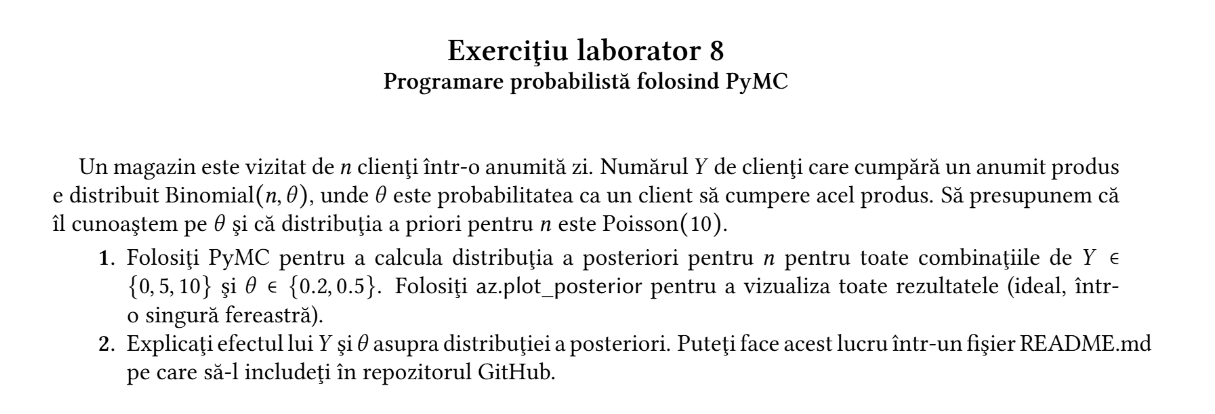

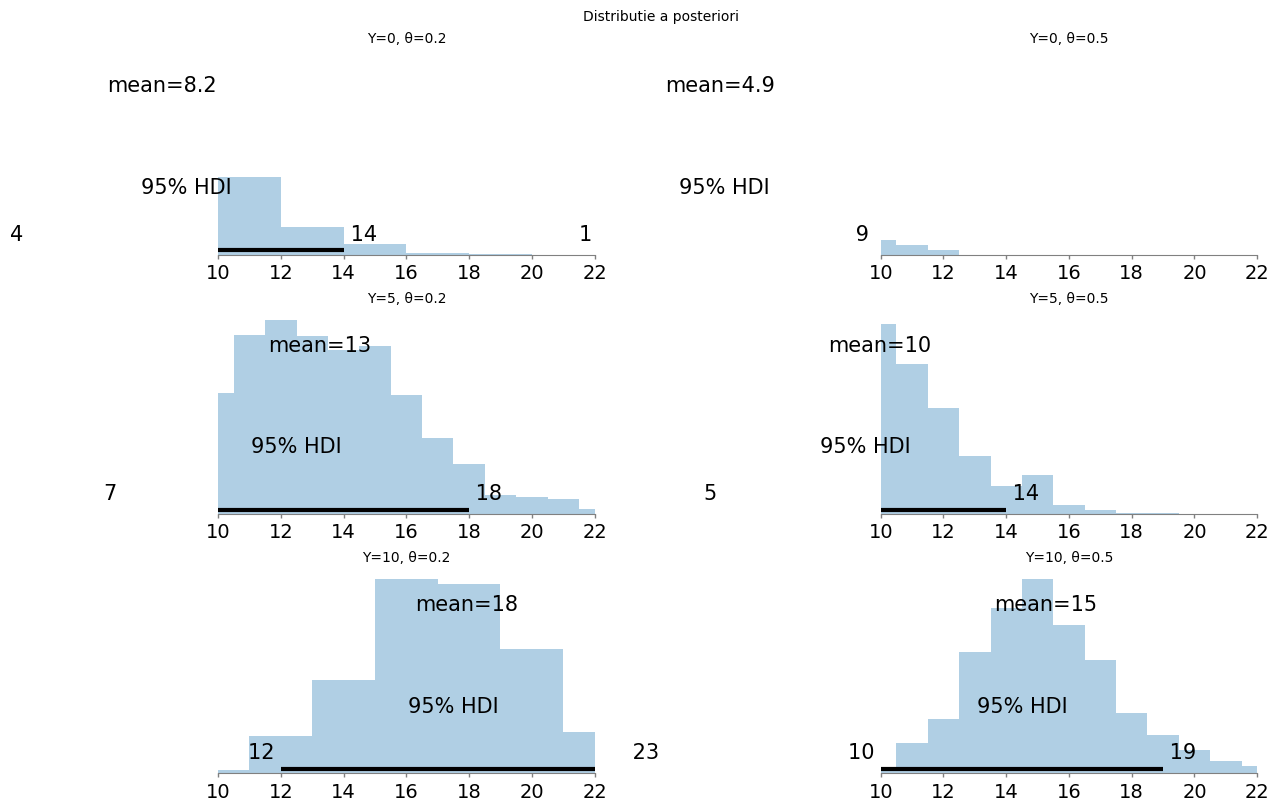

In [12]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt


valori_Y = [0, 5, 10]
valori_theta = [0.2, 0.5]
prior_lambda = 10


results = {}

for theta in valori_theta:
    for y in valori_Y:
        with pm.Model() as model:
            n = pm.Poisson("n", mu=prior_lambda)
            y_obs = pm.Binomial("y_obs", n=n, p=theta, observed=y)

            trace = pm.sample(1000, return_inferencedata=True, progressbar=False)
            results[(y, theta)] = trace


fig, axs = plt.subplots(3, 2, figsize=(12, 8), constrained_layout=True)
x_limits = (10, 22)


for i, y in enumerate(valori_Y):
    for j, theta in enumerate(valori_theta):
        ax = axs[i, j]
        az.plot_posterior(results[(y, theta)], var_names=["n"], ax=ax, hdi_prob=0.95)
        ax.set_title(f"Y={y}, θ={theta}", fontsize=10)
        ax.set_xlim(*x_limits)


fig.suptitle("Distributie a posteriori", fontsize=10)
plt.show()

#Explicatie: valorile mai mari pentru Y duc la valori mai mari asteptate pentru n
# valorile mai mari pentru teta duc la valori mai mici pentru n. pt un anumit Y, la valoarea teta=0.2 se asteapta un n mai mare pt a justifica acel Y